In [389]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [390]:
df = pd.read_csv('loan_data.csv')
df[:10]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [392]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


We check for the unique values and then decide whether we are gonna use Mapping or OneHotEncoding

In [393]:
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [394]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

### Mapping

In [395]:
genderMapping = {"male":0,"female":1}
educationMapping  = { "High School" : 0 , "Associate" : 1 , "Bachelor" : 2 , "Master" : 3  , "Doctorate" : 4 }
prevLoanMapping = { "Yes" : 0 , "No" : 1}

In [396]:
df['person_gender'] = df['person_gender'].map(genderMapping)
df['person_gender']

0        1
1        1
2        1
3        1
4        0
        ..
44995    0
44996    1
44997    0
44998    0
44999    0
Name: person_gender, Length: 45000, dtype: int64

In [397]:
df['person_education'] = df['person_education'].map(educationMapping)
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(prevLoanMapping)

In [398]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,1,3,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,1,1
1,21.0,1,0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,0,0
2,25.0,1,0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,1,1
3,23.0,1,2,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,1,1
4,24.0,0,3,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,0,1,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,1,1
44996,37.0,1,1,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,1,1
44997,33.0,0,1,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,1,1
44998,29.0,0,2,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,1,1


### Binary-valued Encoding using get_dummies method from pandas library

In [399]:
df = pd.get_dummies (
                                df,
                                columns=['person_home_ownership','loan_intent'],
                                drop_first=True,
                                dtype=int
)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,1,3,71948.0,0,35000.0,16.02,0.49,3.0,561,1,1,0,0,1,0,0,0,1,0
1,21.0,1,0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,0,1,0,1,0,0,0,0
2,25.0,1,0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,1,0,0,0,0,0,1,0,0
3,23.0,1,2,79753.0,0,35000.0,15.23,0.44,2.0,675,1,1,0,0,1,0,0,1,0,0
4,24.0,0,3,66135.0,1,35000.0,14.27,0.53,4.0,586,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,0,1,47971.0,6,15000.0,15.66,0.31,3.0,645,1,1,0,0,1,0,0,1,0,0
44996,37.0,1,1,65800.0,17,9000.0,14.07,0.14,11.0,621,1,1,0,0,1,0,1,0,0,0
44997,33.0,0,1,56942.0,7,2771.0,10.02,0.05,10.0,668,1,1,0,0,1,0,0,0,0,0
44998,29.0,0,2,33164.0,4,12000.0,13.23,0.36,6.0,604,1,1,0,0,1,1,0,0,0,0


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   loan_amnt                       45000 non-null  float64
 6   loan_int_rate                   45000 non-null  float64
 7   loan_percent_income             45000 non-null  float64
 8   cb_person_cred_hist_length      45000 non-null  float64
 9   credit_score                    45000 non-null  int64  
 10  previous_loan_defaults_on_file  45000 non-null  int64  
 11  loan_status                     45000 non-null  int64  
 12  person_home_ownership_OTHER     

### Data Preparation and Splitting

In [401]:
X = df.drop(['loan_status'],axis=1)
X

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,1,3,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,0,1,0,0,0,1,0
1,21.0,1,0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,1,0,1,0,0,0,0
2,25.0,1,0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0,0,0,0,0,1,0,0
3,23.0,1,2,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,0,1,0,0,1,0,0
4,24.0,0,3,66135.0,1,35000.0,14.27,0.53,4.0,586,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,0,1,47971.0,6,15000.0,15.66,0.31,3.0,645,1,0,0,1,0,0,1,0,0
44996,37.0,1,1,65800.0,17,9000.0,14.07,0.14,11.0,621,1,0,0,1,0,1,0,0,0
44997,33.0,0,1,56942.0,7,2771.0,10.02,0.05,10.0,668,1,0,0,1,0,0,0,0,0
44998,29.0,0,2,33164.0,4,12000.0,13.23,0.36,6.0,604,1,0,0,1,1,0,0,0,0


In [402]:
y = df['loan_status']

In [403]:
from sklearn.model_selection import train_test_split

In [404]:
X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size=0.3 , random_state= 42 )

### Scalling

In [405]:
from sklearn.preprocessing import StandardScaler

In [406]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
# fit_transform : first the parameters are learned from the fitting of the X_train . 
# Then in tranform the learned paramters are applied to the data in the dataset.
X_test_scaled  = scaler.transform(X_test)
# Here we only use transform as the model is already fitted with X_train and need not re-learn from training set as it will cause data-leaks .

### Model Instantiation and Fitting

In [407]:
from sklearn.linear_model import LogisticRegression

In [408]:
logrmodel = LogisticRegression() 
# logrmodel = LogisticRegression(class_weight='balanced')
# very precise for defaults (92%) but misses more of them (recall 62%).

In [409]:
print(X_train_scaled)
print(y_train)

[[ 1.70570689 -0.90354828 -0.35704948 ...  2.07158145 -0.44782678
  -0.45871685]
 [-0.62391645  1.10674772 -0.35704948 ... -0.48272299 -0.44782678
  -0.45871685]
 [ 0.04169022  1.10674772 -0.35704948 ... -0.48272299 -0.44782678
  -0.45871685]
 ...
 [ 0.87369855  1.10674772 -0.35704948 ... -0.48272299 -0.44782678
   2.17999404]
 [-0.29111311 -0.90354828  1.49982001 ... -0.48272299 -0.44782678
  -0.45871685]
 [-0.29111311  1.10674772 -1.28548422 ... -0.48272299  2.23300627
  -0.45871685]]
30159    0
6777     1
36563    0
11784    0
10370    1
        ..
11284    0
44732    1
38158    0
860      1
15795    0
Name: loan_status, Length: 31500, dtype: int64


In [410]:
logrmodel.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [411]:
y_predictions = logrmodel.predict ( X_test_scaled )

In [412]:
y_predictions

array([0, 0, 1, ..., 0, 0, 0], shape=(13500,))

In [413]:
y_test

37979    0
9911     0
43386    1
13822    0
44810    1
        ..
26280    0
31797    0
3410     0
41758    0
14295    0
Name: loan_status, Length: 13500, dtype: int64

### Model Analysis

In [414]:
from sklearn.metrics import accuracy_score

In [415]:
print(accuracy_score(y_predictions,y_test))

0.8945925925925926


Quite good accuracy of the model considering the dataset size .

In [416]:
from sklearn.metrics import classification_report
# Classification report of the predictions and the test values . 
# Pretty convenient as it almost gives all the accuracy parameters for it.

In [417]:
print(classification_report(y_predictions,y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10584
           1       0.75      0.77      0.76      2916

    accuracy                           0.89     13500
   macro avg       0.84      0.85      0.85     13500
weighted avg       0.90      0.89      0.90     13500



In [418]:
from sklearn.metrics import confusion_matrix
# Confusion matrix is good as it gives the matrix of all the Correct predictions and Actual predictions . 

In [419]:
conf_matrix = (confusion_matrix(y_predictions,y_test))

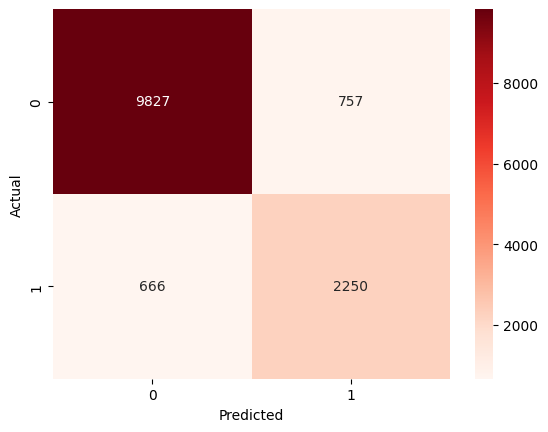

In [420]:
sns.heatmap ( 
                conf_matrix ,
                annot = True ,
                fmt = "d",
                cmap = 'Reds'
             )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Color schemes for cmap :
# cmap options : "Blues" "Greens"  "Oranges" "Purples"  "Reds"  "coolwarm"  "PiYG"  "tab10"  "Set3"  "Pastel2" "inferno" "magma"  "cividis"

ROC curve for plotting True Positive Rate on y-axis and False Positive Rate on x-axis <br>
AUC the area under the ROC curve. <br>
The greater the value the better the discrimination.

In [421]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_predictions))

0.8423915942377979


Cross Val Score says that data is consistently performing for different subsets of data and not just this fold

In [422]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logrmodel, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(scores.mean())


0.8976190476190476
